"""
Name: Sundeep Ravichander
Library:plotnine (ggplot for Python)
URL: https://plotnine.readthedocs.io
Description:
This library implements the Grammar of Graphics in Python, enabling concise,
layered, publication-quality visualizations in Python data science workflows.
"""


In [17]:
!pip install ggplot
!pip install plotnine
from plotnine import ggplot, aes, geom_point, geom_smooth,geom_histogram, labs,geom_col,geom_boxplot,facet_grid,theme_xkcd, theme_minimal
import pandas as pd 


Step 1 : Data: Here we are using the Boston Housing Data set for the  review and we read it with the help of  Pandas

In [19]:
DATA_PATH = "/Users/sundeepravichander/OIM7502_F25/BostonHousing.csv"

def load_csv(path: str) -> pd.DataFrame:
    """Load CSV safely with encoding fallbacks."""
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        for enc in ("latin1", "ISO-8859-1", "cp1252"):
            try:
                return pd.read_csv(path, encoding=enc)
            except UnicodeDecodeError:
                continue
        raise

df = load_csv(DATA_PATH)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,ISHIGHVAL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


The very first step in the Grammar of Graphics is the Data Layer. For this demo I would be using the Boston Housing dataset.  This contains data about  housing values and socio economic conditions for various  neighborhoods in the Boston area
Each row represents a single observation..

**DATA Dictionary**

CRIM – Per capita crime rate by town

ZN – Proportion of residential land zoned for large lots

INDUS – Proportion of non-retail business acres per town

CHAS – Dummy variable indicating proximity to the Charles River (1 = yes, 0 = no)

NOX – Nitric oxide concentration (pollution level)

RM – Average number of rooms per dwelling

AGE – Proportion of older buildings (built before 1940)

DIS – Weighted distance to employment centers

RAD – Accessibility to radial highways

TAX – Property tax rate per $10,000

PTRATIO – Pupil-teacher ratio

LSTAT – Percentage of lower-status population

MEDV – Median value of owner-occupied homes (in $1000s)

ISHIGHVAL – Binary flag (1 = high-value home, 0 = lower-value home) 

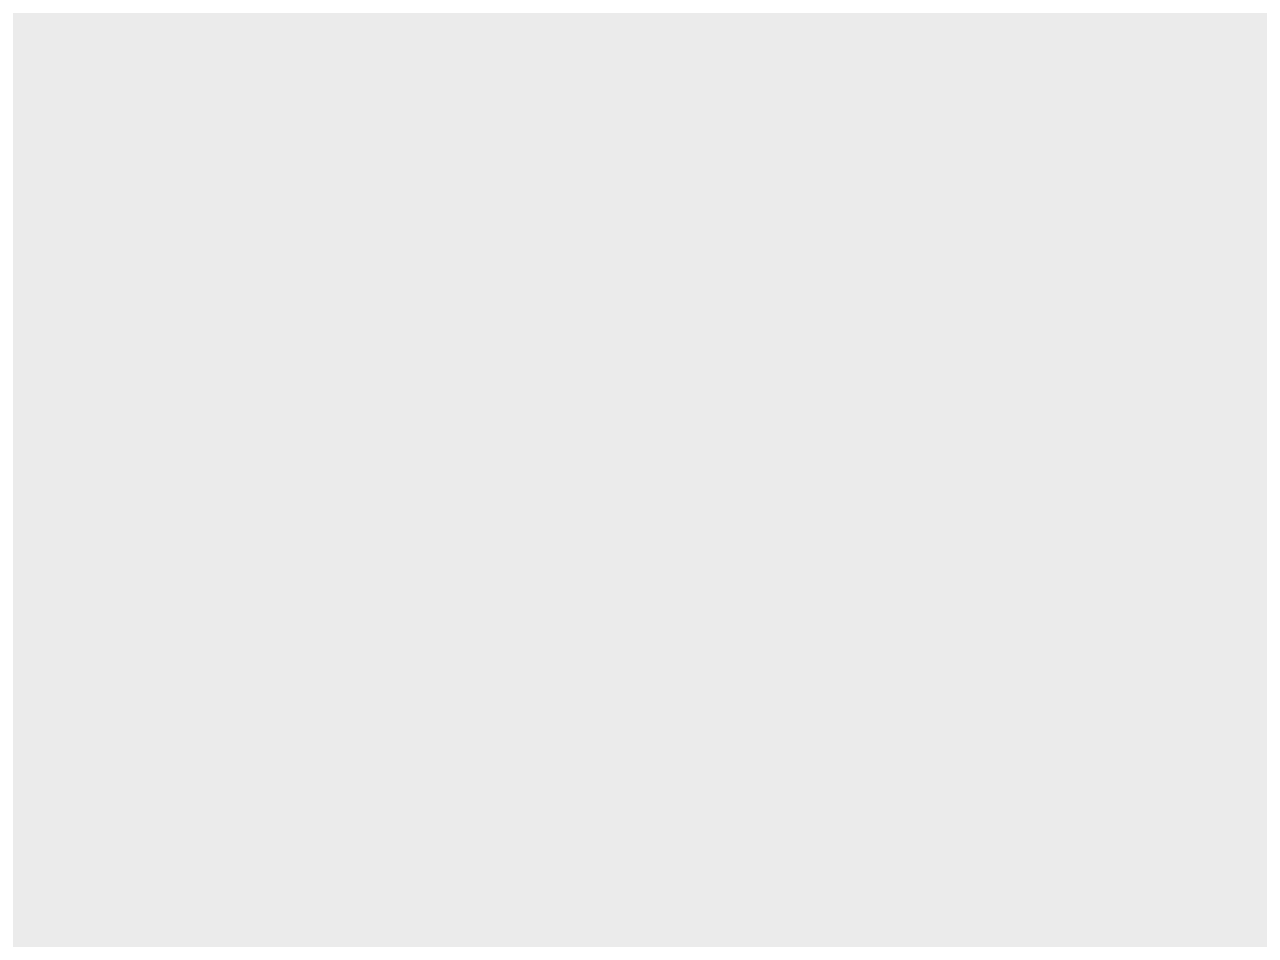

In [52]:
df =pd.read_csv('/Users/sundeepravichander/OIM7502_F25/BostonHousing.csv')

# passing the data to the ggplot constructor
ggplot(df)

We load Boston Housing dataset into Pandas dataframe using the read_csv() function. After loading the data, we initialize a plot object for  the dataset using the ggplot() function from the plotnine library
At this instance the output will appear blank as we have not specified the other two  components.

2. Aesthetics:

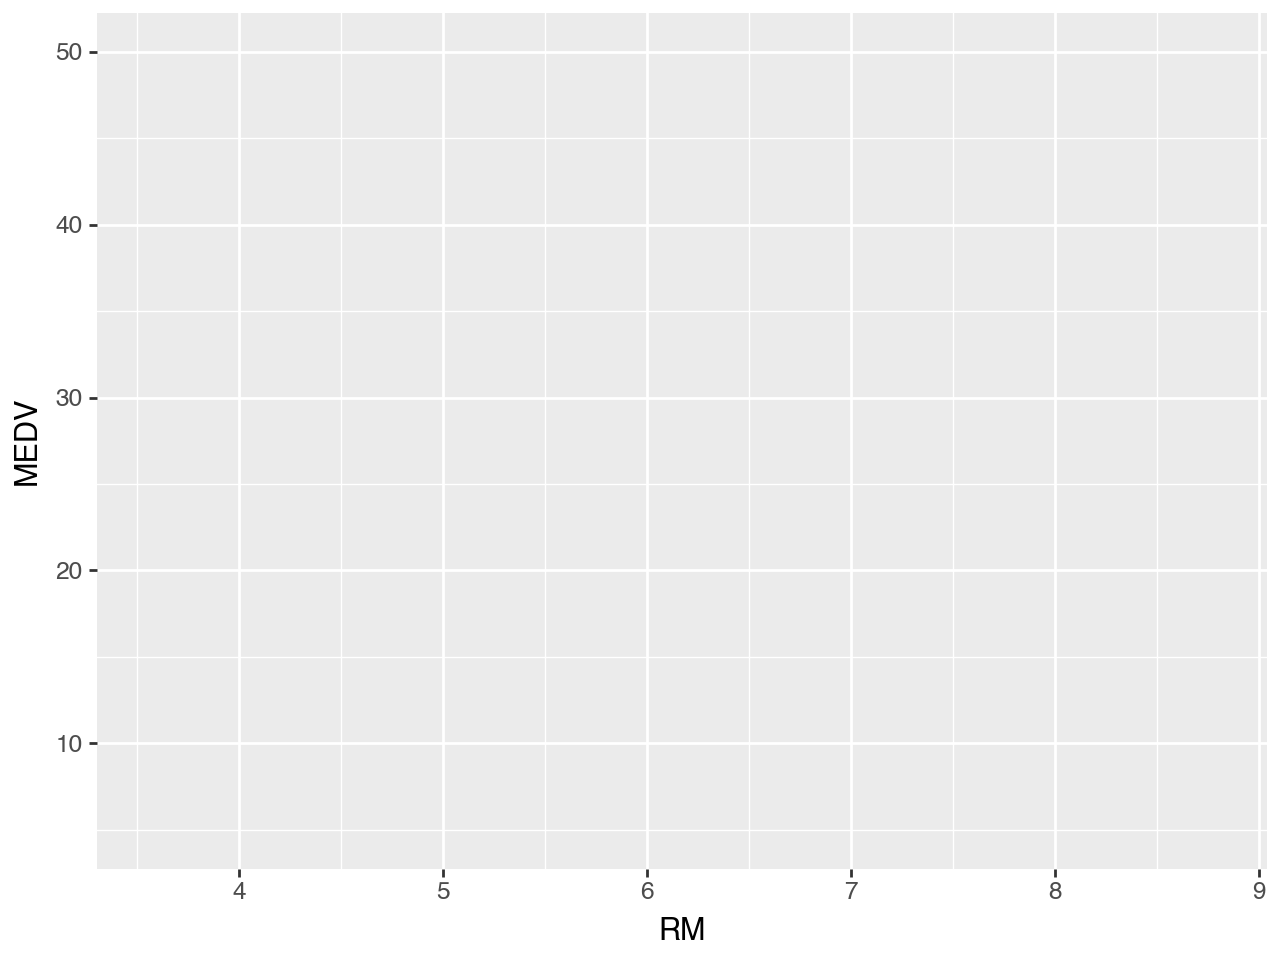

In [50]:
ggplot(df) + aes(x="RM", y="MEDV") 

This step involves defining which variables from the dataset correspond to the x and y axes, colors, shapes and other attributes. For 

Geometric Objects:

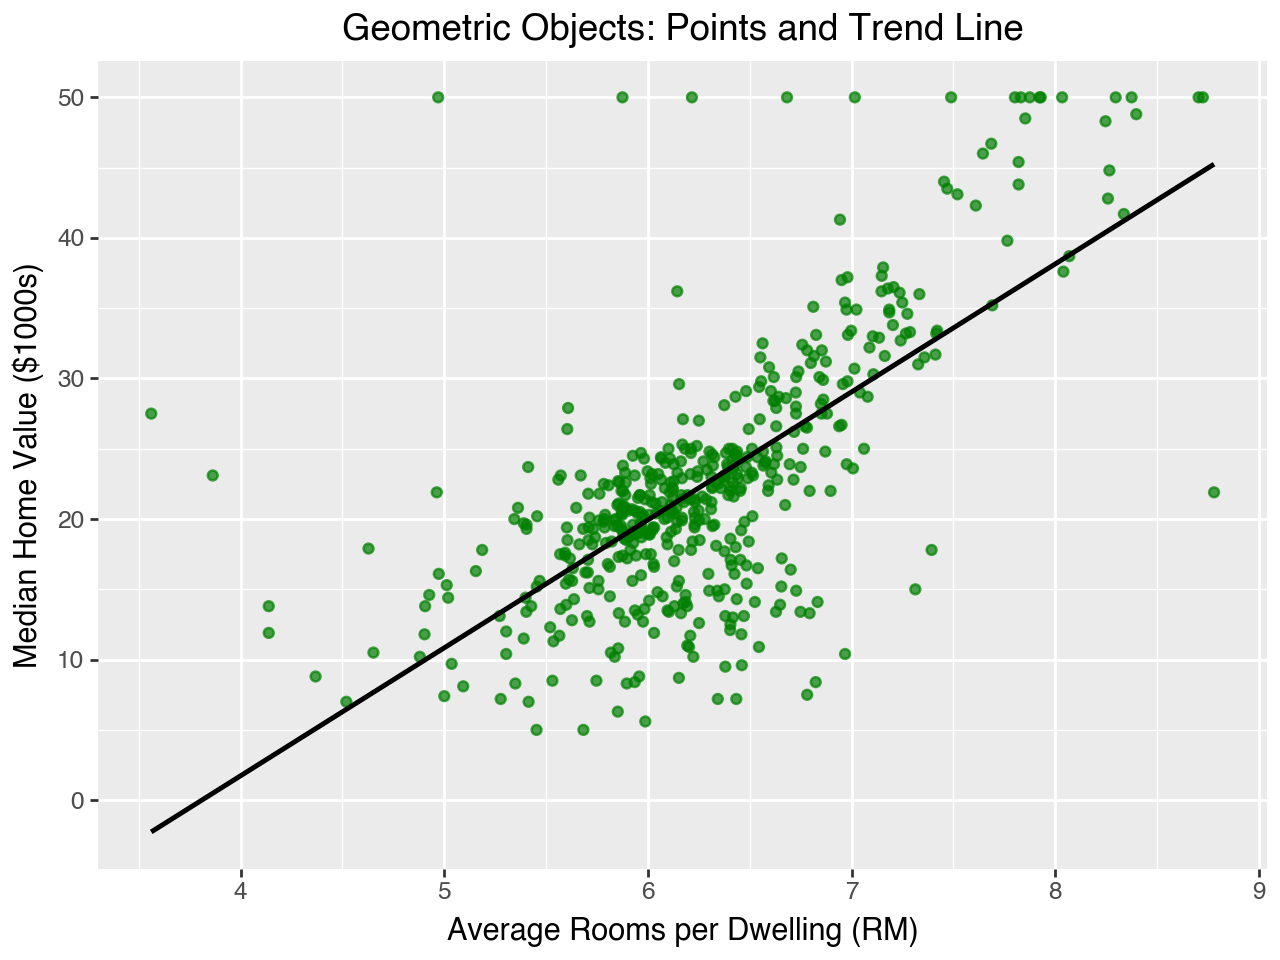

In [80]:

(
    ggplot(df)
    + aes(x="RM", y="MEDV")
    + geom_point(color="green", alpha=0.7)
    + geom_smooth(method="lm", color="black", se=False)
    + labs(
        title="Geometric Objects: Points and Trend Line",
        x="Average Rooms per Dwelling (RM)",
        y="Median Home Value ($1000s)"
    )
)


**In this step the objective is to introduce the Geometric Objects layer**. This determines how the data would be represented  visually.. Here we use the  geom_point() for the same. Each green dor is an observation (neighbourhood) showing the relationship between  "Average number of rooms per dwelling "(RM) and the "Median home value "(MEDV) 

Statistical transformation 

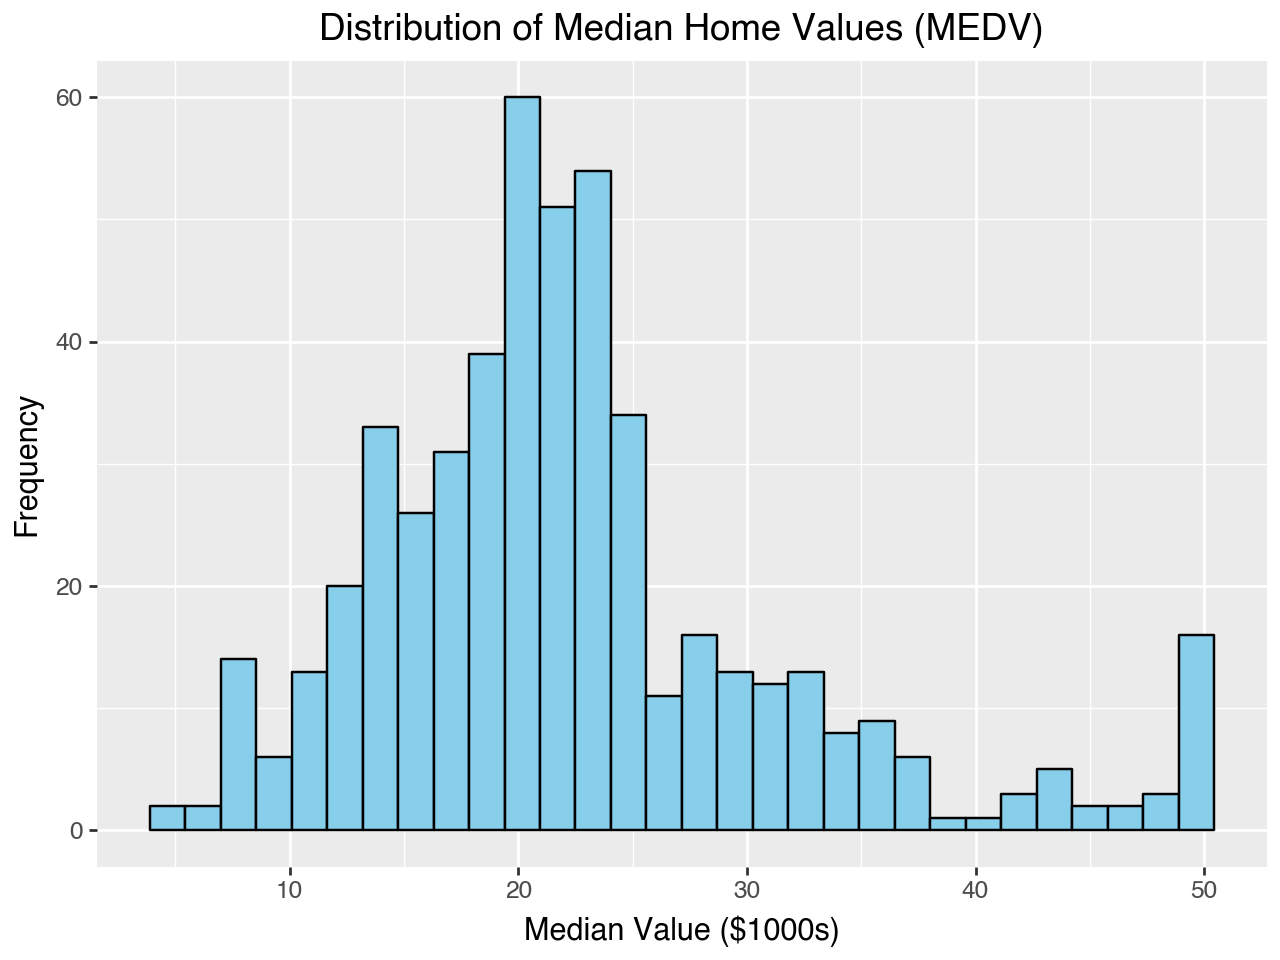

In [82]:
# Create histogram
(
    ggplot(df)
    + aes(x="MEDV")
    + geom_histogram(bins=30, fill="skyblue", color="black")
    + labs(
        title="Distribution of Median Home Values (MEDV)",
        x="Median Value ($1000s)",
        y="Frequency"
    )

)

**In this step we explore the Statistical Trasnformation:**
A Statistical Transformation is used to summarize  oir transform the data before it is plotted.
Here we are using the geom_histogram() to group the data in bins.The values of MEDV — the median home value — into intervals and count how many observations fall into each bin.
The Histogram shown above  displays the distribution  of home values across Boston neighborhoods. Most of the homes are clustered around the 20,000 to 25,000 range..

**Coordinate**


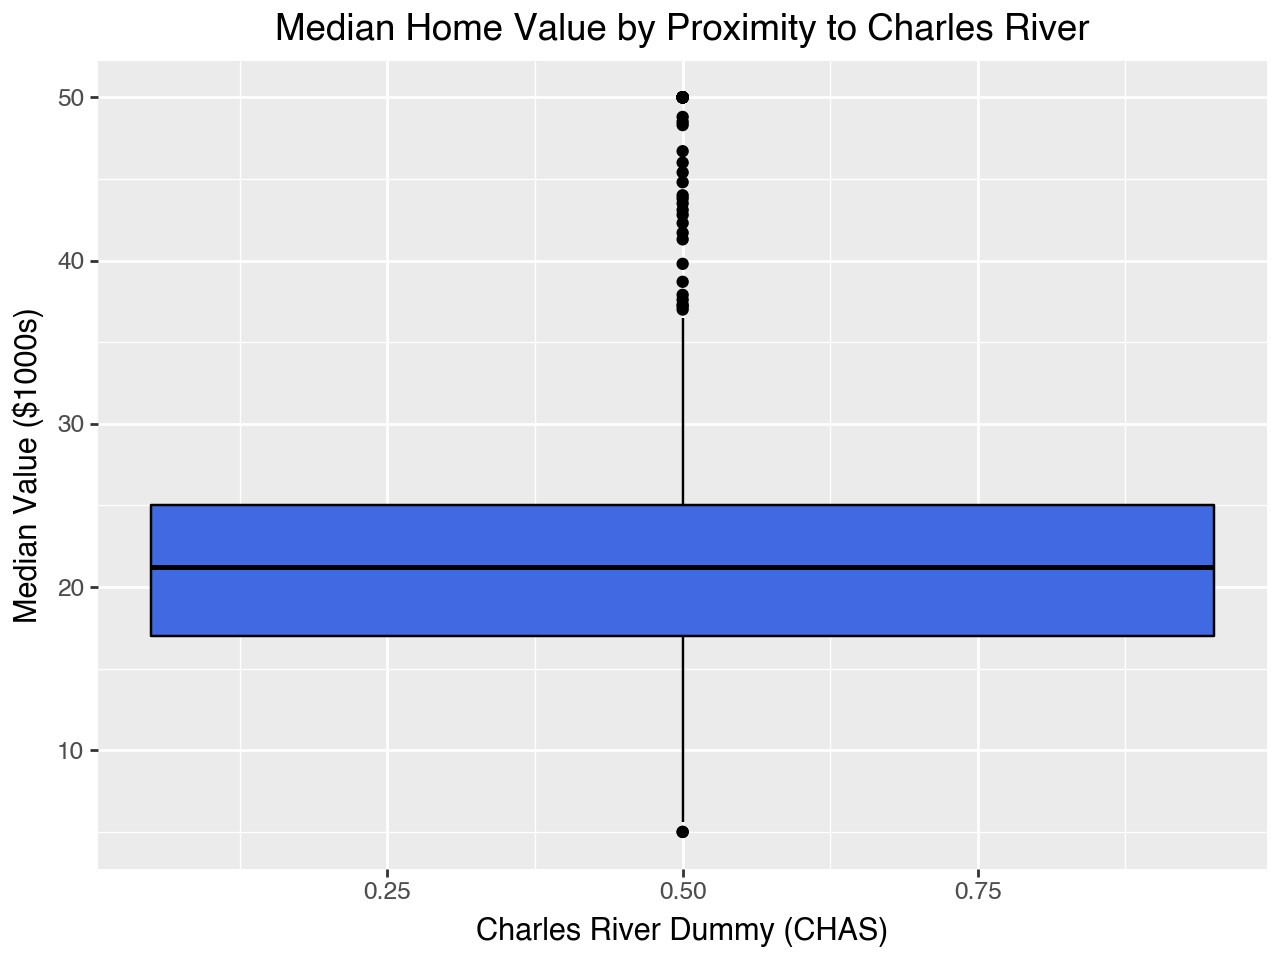

In [84]:

(
    ggplot(df)
    + aes(x="CHAS", y="MEDV")
    + geom_boxplot(fill="royalblue", color="black")
    + labs(
        title="Median Home Value by Proximity to Charles River",
        x="Charles River Dummy (CHAS)",
        y="Median Value ($1000s)"
    )
)



**In this step we explore the Coordinate Systems:**
Coordinate systems define how data points are positioned and interpreted on a two-dimensional plane.
Here we are using a boxplot to compare the distribution  of median home values (MEDV) considering if the neighborhood  borders the Chrales River (CHAS).
The x-axis represents the Charles River dummy variable (CHAS), where 1 indicates homes near the river and 0 indicates homes farther away. The y-axis represents the median home value (in $1000s).
From the above boxplot is is clear that the closer the neighborhood is to the Charles River, Higher is the Median value..


**Layer: Facets — Comparing Subgroups**

This plot uses the Facet layer to compare housing trends by proximity to the Charles River (CHAS).
The chart shows mean median home values (MEDV_mean) across room bins (RM_BIN), with bars colored by building age (AGE_BIN).

From the visualization, homes near the river generally have higher median values, and newer buildings (yellow) tend to be more valuable across all room categories.

/var/folders/2n/lq__dftn5yb18dj6bbxg48jw0000gn/T/ipykernel_2105/1994980158.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:358: PlotnineWarning: position_stack : Removed 5 rows containing missing values.


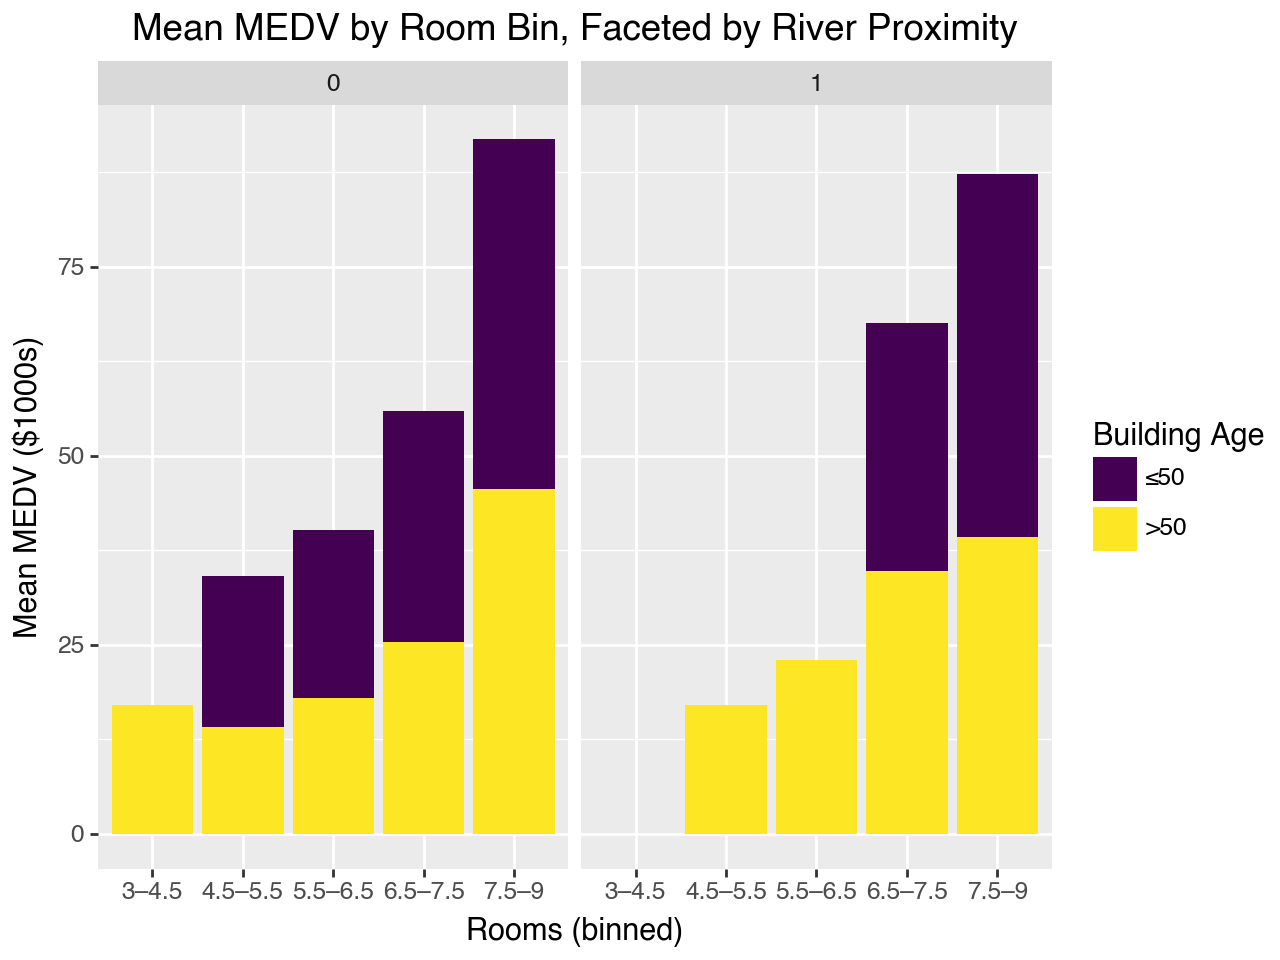

In [21]:
 #1) Create categorical/binned variables
df = df.copy()
df["RM_BIN"] = pd.cut(
    df["RM"],
    bins=[3, 4.5, 5.5, 6.5, 7.5, 9],
    labels=["3–4.5", "4.5–5.5", "5.5–6.5", "6.5–7.5", "7.5–9"],
    include_lowest=True,
)
df["AGE_BIN"] = pd.cut(
    df["AGE"],
    bins=[0, 50, 100],
    labels=["≤50", ">50"],
    include_lowest=True,
)

# 2) Aggregate to get a single y-value per category combo (like tips example)
summary = (
    df.groupby(["CHAS", "RM_BIN", "AGE_BIN"], dropna=False)["MEDV"]
      .mean()
      .reset_index(name="MEDV_mean")
)

# 3) Plot: facet by CHAS, x = RM_BIN, fill = AGE_BIN, y = MEDV_mean (geom_col)
(
    ggplot(summary)
    + facet_grid("~CHAS")  # 
    + aes(x="RM_BIN", y="MEDV_mean", fill="AGE_BIN")
    + geom_col()
    + labs(
        title="Mean MEDV by Room Bin, Faceted by River Proximity",
        x="Rooms (binned)",
        y="Mean MEDV ($1000s)",
        fill="Building Age"
    )
)